In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline




In [7]:
raw_trainData = pd.read_csv('./train.csv')
testData = pd.read_csv('./test.csv')

train_Data = raw_trainData.fillna(0)

X = train_Data
y = train_Data.Survived

X_test_full = testData


X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

object_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == "object"]
low_cardinality_cols = [col for col in object_cols if X_train_full[col].nunique() < 3]



X_train_sex = pd.get_dummies(X_train_full[low_cardinality_cols]) 
X_valid_sex = pd.get_dummies(X_valid_full[low_cardinality_cols])
X_test_sex =  pd.get_dummies(X_test_full[low_cardinality_cols])

X_train_with_no_categorical = X_train_full.drop(object_cols, axis=1).drop('Survived', axis=1).copy() 
X_valid_with_no_categorical = X_valid_full.drop(object_cols, axis=1).drop('Survived', axis=1).copy() 
X_test_with_no_categorical = X_test_full.drop(object_cols, axis=1).copy() 


X_train = pd.concat([X_train_sex, X_train_with_no_categorical],axis=1).fillna(0)
X_valid = pd.concat([X_valid_sex, X_valid_with_no_categorical], axis=1).fillna(0)
X_test = pd.concat([X_test_sex, X_test_with_no_categorical],axis=1).round(1).fillna(0)

In [103]:
from sklearn.model_selection import cross_val_score


In [76]:
results = {}
for i in range(1,11):
    results[100*i] = get_score(100*i, 1)

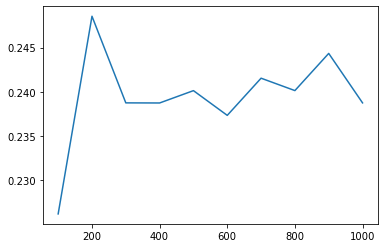

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [106]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05, n_iter_no_change=5,tol=0.01, random_state=1)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                           n_iter_no_change=5, random_state=1, tol=0.01)

In [107]:
preds_test = model.predict(X_test)
output = pd.DataFrame({'PassengerId': X_test_full.PassengerId,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)